In [3]:
# K-means Clustering / K값을 적절히 설정하는 것이 매우중요(반복해서 만들면서 가장 좋은 상태를 확인)
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

iris = load_iris()
iris_data = iris.data
iris_data_pd = pd.DataFrame(iris_data, columns = iris.feature_names)
iris_data_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


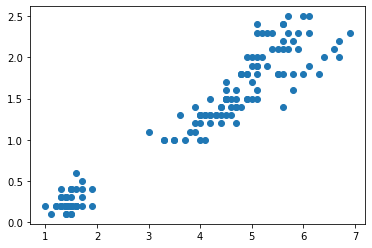

In [43]:
petals = pd.DataFrame(iris_data_pd.values[:, 2:4], columns = ['petal length (cm)', 'petal width (cm)'])
plt.scatter(petals.values[:, 0], petals.values[:, 1])
plt.show()

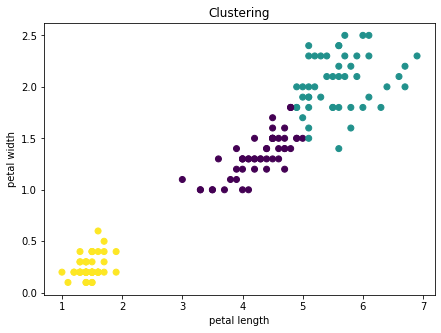

In [44]:
from sklearn.cluster import KMeans

plt.figure(figsize = (7, 5))
km = KMeans(n_clusters = 3, random_state = 20)
km.fit(iris_data_pd.iloc[:, 2:4])
y_pred = km.predict(iris_data_pd.iloc[:, 2:4])
plt.scatter(iris_data_pd.iloc[:, 2], iris_data_pd.iloc[:, 3], c = y_pred)
plt.title('Clustering')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [39]:
value = km.predict(iris_data_pd.iloc[:, 2:4])
np.where(value == 0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 98],
       dtype=int64),)

In [18]:
print(km.predict(iris_data_pd.iloc[:, 2:4]))
print(iris_data_pd.iloc[98, 2:4])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
petal length (cm)    3.0
petal width (cm)     1.1
Name: 98, dtype: float64


In [27]:
km.cluster_centers_

array([[1.49215686, 0.2627451 ],
       [4.92525253, 1.68181818]])

In [28]:
def distance(x1, x2, y1, y2):
    dx = x2 - x1
    dy = y2 - y1
    squared = dx**2 + dy**2
    result = math.sqrt(squared)
    return result

In [34]:
print(f'0 cluster distance : {distance(iris_data_pd.iloc[98,2], iris_data_pd.iloc[98,3], km.cluster_centers_[0][0], km.cluster_centers_[0][1])}')
print(f'1 cluster distance : {distance(iris_data_pd.iloc[98,2], iris_data_pd.iloc[98,3], km.cluster_centers_[1][0], km.cluster_centers_[1][1])}')

0 cluster distance : 2.263062811147148
1 cluster distance : 3.758971447107489


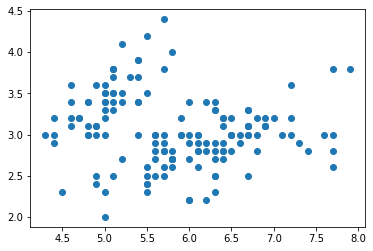

In [41]:
sepals = pd.DataFrame(iris_data_pd.values[:, :2], columns = ['petal length (cm)', 'petal width (cm)'])
plt.scatter(sepals.values[:, 0], sepals.values[:, 1])
plt.show()

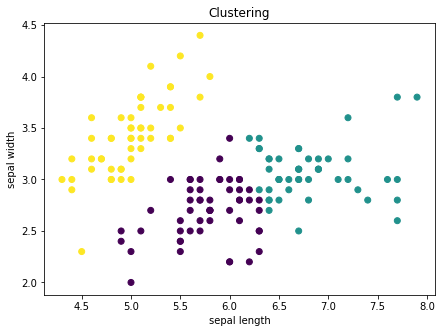

In [55]:
from sklearn.cluster import KMeans

plt.figure(figsize = (7, 5))
km = KMeans(n_clusters = 3, random_state = 20)
km.fit(iris_data_pd.iloc[:, :2])
y_pred = km.predict(iris_data_pd.iloc[:, :2])
plt.scatter(iris_data_pd.iloc[:, 0], iris_data_pd.iloc[:, 1], c = y_pred)
plt.title('Clustering')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

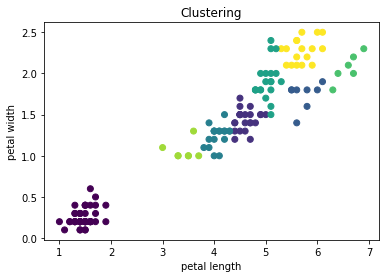

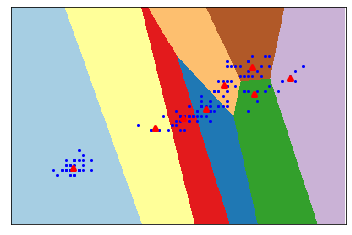

In [59]:
km12 = KMeans(n_clusters = 8, random_state = 20)
km12.fit(iris_data_pd.iloc[:, 2:4])
y_pred12 = km12.predict(iris_data_pd.iloc[:, 2:4])
plt.title('Clustering')
plt.xlabel('petal length')
plt.ylabel('petal width')
graph1 = plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:, 3], c=y_pred12)
plt.show()

h = .02 # point in the mesh [x_min, x_max]x[y_min, y_max]
km12 = KMeans(n_clusters = 8, random_state = 20)
km12.fit(iris_data_pd.iloc[:, 2:4])
y_pred12 = km12.predict(iris_data_pd.iloc[:, 2:4])
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = iris_data_pd.iloc[:, 2].min() - 1, iris_data_pd.iloc[:, 2].max() + 1
y_min, y_max = iris_data_pd.iloc[:, 3].min() - 1, iris_data_pd.iloc[:, 3].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model
Z = km12.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation = 'nearest', extent = (xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Paired, aspect = 'auto', origin = 'lower')
plt.plot(iris_data_pd.iloc[:, 2], iris_data_pd.iloc[:, 3], 'bo', markersize = 2)

# Plot the centroids as as white X
centroids = km12.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = '^', s = 16, linewidths = 3, color = 'r', zorder = 10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

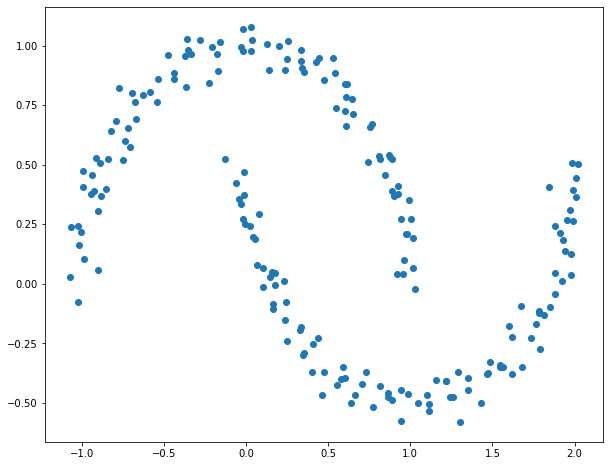

In [60]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(200, noise = 0.05, random_state = 0)

plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [91]:
pd.DataFrame(X).head()

,0,1
0,0.816805,0.521645
1,1.618596,-0.379829
2,-0.021270,0.273728
3,-1.021810,-0.075440
4,1.766546,-0.170699


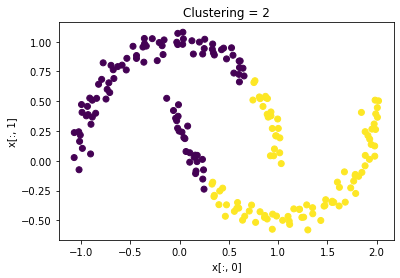

[[-0.2003285   0.58035606]
 [ 1.20736718 -0.0825517 ]]


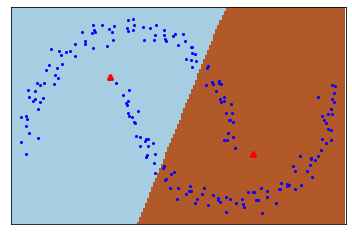

In [111]:
km_moon = KMeans(n_clusters = 2, random_state = 21)
km_moon.fit(X)
y_pred_moon = km_moon.predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_pred_moon)
plt.title('Clustering = 2')
plt.xlabel('x[:, 0]')
plt.ylabel('x[:, 1]')
plt.show()
print(km_moon.cluster_centers_)

h = .02 # point in the mesh [x_min, x_max]x[y_min, y_max]
km_moon = KMeans(n_clusters = 2, random_state = 20)
km_moon.fit(X)
y_pred_moon = km_moon.predict(X)
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model
Z = km_moon.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation = 'nearest', extent = (xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Paired, aspect = 'auto', origin = 'lower')
plt.plot(X[:, 0], X[:, 1], 'bo', markersize = 2)

# Plot the centroids as as white X
centroids = km_moon.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = '^', s = 16, linewidths = 3, color = 'r', zorder = 10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [93]:
value = km_moon.predict(X)
print(value)
print(np.where(value == 1))

[1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1
 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0
 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0
 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1
 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1]
(array([  0,   1,   4,   5,   6,   7,   8,   9,  12,  13,  15,  17,  20,
        21,  23,  26,  27,  30,  32,  34,  35,  36,  37,  40,  44,  46,
        49,  51,  52,  54,  55,  57,  60,  62,  63,  64,  67,  70,  72,
        74,  77,  79,  80,  82,  83,  86,  88,  89,  91,  92,  94,  95,
        96,  97, 100, 101, 103, 108, 114, 115, 117, 118, 119, 120, 126,
       128, 129, 130, 134, 135, 136, 138, 139, 145, 147, 150, 151, 152,
       154, 156, 157, 161, 163, 164, 165, 167, 168, 169, 175, 176, 180,
       182, 183, 184, 187, 192, 193, 196, 199], dtype=int64),)


In [112]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

In [130]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [140]:
digits['images'][0], digits['data'][0]

(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]),
 array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]))

In [158]:
km = KMeans(10)
clus = km.fit_predict(digits.data) 
km.cluster_centers_.shape

(10, 64)

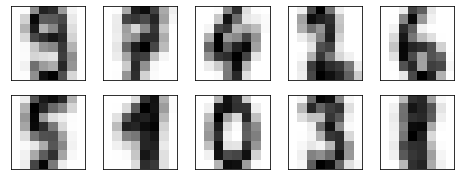

In [160]:
fig, ax = plt.subplots(2, 5, figsize = (8, 3))
centers = km.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks = [], yticks = [])
    axi.imshow(center, interpolation = 'nearest', cmap = plt.cm.binary)